# Universidade de Brasília - UnB

Campus UnB Gama - FGA

CURSOS: Engenharia de Software e Engenharia Eletrônica

DISCIPLINA: Tópicos Especiais em Software e Eletrônica

CONTEÚDO: Métodos Quantitativos em Finanças

ALUNO: Eduardo Sousa S. Rodrigues MATRÍCULA: 140038558

## Trabalho 1

### 1) Considerando os índices da Bovespa, pertencente aos conjuntos Setorial ou por Segmento, (i) escolha aos seu critério 5 (cinco) índices e entre esses escolhidos os 5 (cinco) papeis mais líquidos. http://www.bmfbovespa.com.br/pt_br/produtos/indices/

Os índices escolhidos são do conjunto Setorial, mais especificamente os que compõem a carteira do IMOB( Índice Imobiliário): http://www.bmfbovespa.com.br/pt_br/produtos/indices/indices-setoriais/indice-bm-fbovespa-imobiliario-imob-composicao-da-carteira.htm 

Para definir os 5 mais Líquidos, foi calculadada a média de volume diário de cada índice. Os que obtiveram maior volume diário médio, teoricamente possuem maior liquidez.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Set 21 09:11:31 2018

@author:Eduardo S. Sales
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
#import plotly.plotly as py
#import plotly.graph_objs as go
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
#import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
#from matplotlib.finance import candlestick_ohlc
#import urllib
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import seaborn as sns
sns.set()

In [2]:
def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

# Índices da Carteira IMOB
Stocks=['ALSC3','BRML3', 'BRPR3','CYRE3','DIRR3','EVEN3','EZTC3','GFSA3','HBOR3','IGTA3','MRVE3','MULT3','TEND3']
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

N_months=24
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
stocks_all.head()

[*********************100%***********************]  13 of 13 downloaded


Open                                                        \
           ALSC3.SA BRML3.SA BRPR3.SA CYRE3.SA DIRR3.SA EVEN3.SA EZTC3.SA   
Date                                                                        
2016-10-04    15.70  10.9130     8.55    10.55     5.98     3.96    15.38   
2016-10-05    15.81  11.0435     8.53    10.35     5.80     3.95    15.36   
2016-10-06    15.99  11.0435     8.58    10.51     5.71     3.94    15.45   
2016-10-07    16.07  11.0783     8.49    10.64     5.65     3.98    15.57   
2016-10-10    16.02  11.2696     8.58    10.74     5.78     4.02    15.33   

                                          ...      Volume                    \
           GFSA3.SA HBOR3.SA   IGTA3.SA   ...    CYRE3.SA DIRR3.SA EVEN3.SA   
Date                                      ...                                 
2016-10-04  20.3997  1.94711  30.090000   ...     1125400  1314700   303400   
2016-10-05  20.3997  1.87996  30.040001   ...     1844200   745600   294700   
2016-10-06  20.7575  1.84160  30.250000   ...     1064400   806900   338300   
2016-10-07  20.6383  1.88956  30.090000   ...     1836500   547200   484000   
2016-10-10  20.6383  1.86078  30.600000   ...     1135100   522800   319900   

                                                                           
           EZTC3.SA GFSA3.SA HBOR3.SA IGTA3.SA MRVE3.SA MULT3.SA TEND3.SA  
Date                                                                       
2016-10-04   404600   243218   954163   193800  1371500  2153100      NaN  
2016-10-05   901300   658210   749401   200500  2063900  1180500      NaN  
2016-10-06   710100   256898   566638   189500   981600  1527600      NaN  
2016-10-07   899600   263780   566430   574400  2821000  2486400      NaN  
2016-10-10   320200   224416   257099   337500  1662300  1045500      NaN  

[5 rows x 78 columns]

In [3]:
stocks_volume = stocks_all['Volume'] # Apenas os Volumes diários de cada índice.
stocks_volume 

,ALSC3.SA,BRML3.SA,BRPR3.SA,CYRE3.SA,DIRR3.SA,EVEN3.SA,EZTC3.SA,GFSA3.SA,HBOR3.SA,IGTA3.SA,MRVE3.SA,MULT3.SA,TEND3.SA
Date,,,,,,,,,,,,,
2016-10-04,344400,7061000,213900,1125400,1314700,303400,404600,243218,954163,193800,1371500,2153100,NaN
2016-10-05,310000,3243345,144400,1844200,745600,294700,901300,658210,749401,200500,2063900,1180500,NaN
2016-10-06,198900,4269375,292400,1064400,806900,338300,710100,256898,566638,189500,981600,1527600,NaN
2016-10-07,939200,10179685,191600,1836500,547200,484000,899600,263780,566430,574400,2821000,2486400,NaN
2016-10-10,463300,3587425,411300,1135100,522800,319900,320200,224416,257099,337500,1662300,1045500,NaN
2016-10-11,247400,5806810,390200,1388200,421000,329800,743600,199646,179114,2873000,2099600,1215600,NaN
2016-10-13,266200,7994685,438200,2259700,513600,933300,745800,404120,270548,1196900,2811700,1480800,NaN
2016-10-14,518700,6634810,328600,1484900,680200,822500,620800,599818,1499220,253300,1847800,1299300,NaN
2016-10-17,601400,11259650,393800,1899000,609300,483500,505200,450869,1007230,484100,3393200,987300,NaN


In [4]:
media_volume = stocks_volume.fillna(0).mean()
mediaVolume = pd.DataFrame.from_dict(media_volume)
mediaVolume.columns=["Média"]
mediaVolume.sort_values('Média',ascending=False) #Organizados a partir dos que possuem média mais alta

,Média
BRML3.SA,5.743919e+06
MRVE3.SA,2.923077e+06
MULT3.SA,2.279522e+06
CYRE3.SA,2.273402e+06
HBOR3.SA,1.505803e+06
IGTA3.SA,1.052699e+06
EVEN3.SA,8.396117e+05
GFSA3.SA,8.011136e+05
DIRR3.SA,7.640515e+05
BRPR3.SA,6.758425e+05


In [5]:
MaisLiquidos = mediaVolume.sort_values('Média',ascending=False).iloc[:5]
MaisLiquidos #5 índices mais líquidos dos 13 selecionados inicialmente

,Média
BRML3.SA,5.743919e+06
MRVE3.SA,2.923077e+06
MULT3.SA,2.279522e+06
CYRE3.SA,2.273402e+06
HBOR3.SA,1.505803e+06


### 2) Identifique (ii) a correlação entre os preços e os retornos. E refaça a escolha dos papeis, de forma que a correlação entre eles nunca fique acima de 0.8.

Primeiro foi separado o 5 escolhidos, em seguida separado apenas o preço de fechamento par obter os retornos deles. Por fim foi feita a correlação entre os índices em relação aos retornos e em relação aos preçõs de fechamento.

In [6]:

Liquidos=['BRML3', 'CYRE3','HBOR3','MRVE3','MULT3']
Liquidos=[Liquidos[k]+'.SA' for k in range(len(Liquidos))]

N_months=24
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

liquidos_all=yahoo(Liquidos,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

liquidos = pd.DataFrame.from_dict(liquidos_all)

[*********************100%***********************]  5 of 5 downloaded


In [7]:
close = liquidos_all['Close'].fillna(0)
Close = pd.DataFrame.from_dict(close)

Close

,BRML3.SA,CYRE3.SA,HBOR3.SA,MRVE3.SA,MULT3.SA
Date,,,,,
2016-10-04,10.99130,10.38,1.87996,11.88,21.476700
2016-10-05,11.09560,10.51,1.83201,12.08,21.530001
2016-10-06,11.02610,10.59,1.87996,12.07,21.333300
2016-10-07,11.26090,10.69,1.84160,12.18,21.676701
2016-10-10,11.24350,10.85,1.85119,12.18,21.693300
2016-10-11,11.11300,10.85,1.85119,12.26,21.219999
2016-10-13,11.20870,10.75,1.85119,11.98,21.166700
2016-10-14,11.14780,10.81,1.91833,12.03,21.313299
2016-10-17,11.38260,10.61,1.90874,12.27,21.363300


In [8]:
retorno_BRML3 = Close['BRML3.SA'][1:].values/Close['BRML3.SA'][0:-1].values-1
retorno_CYRE3 = Close['CYRE3.SA'][1:].values/Close['CYRE3.SA'][0:-1].values-1
retorno_HBOR3 = Close['HBOR3.SA'][1:].values/Close['HBOR3.SA'][0:-1].values-1
retorno_MRVE3 = Close['MRVE3.SA'][1:].values/Close['MRVE3.SA'][0:-1].values-1
retorno_MULT3 = Close['MULT3.SA'][1:].values/Close['MULT3.SA'][0:-1].values-1
Retorno = {'R_BRML3': retorno_BRML3,
           'R_CYRE3': retorno_CYRE3,
           'R_HBOR3': retorno_HBOR3,
           'R_MRVE3': retorno_MRVE3,
           'R_MULT3': retorno_MULT3}
dfRetorno = pd.DataFrame(Retorno,index = Close.index[0:-1],columns =['R_BRML3','R_CYRE3','R_HBOR3','R_MRVE3','R_MULT3'])
dfRetorno.corr()

,R_BRML3,R_CYRE3,R_HBOR3,R_MRVE3,R_MULT3
R_BRML3,1.000000,0.584108,0.426000,0.469786,0.688506
R_CYRE3,0.584108,1.000000,0.481303,0.588831,0.601043
R_HBOR3,0.426000,0.481303,1.000000,0.428147,0.418773
R_MRVE3,0.469786,0.588831,0.428147,1.000000,0.503432
R_MULT3,0.688506,0.601043,0.418773,0.503432,1.000000


In [9]:
Close.corr()

,BRML3.SA,CYRE3.SA,HBOR3.SA,MRVE3.SA,MULT3.SA
BRML3.SA,1.000000,0.619340,0.850769,0.511469,0.922065
CYRE3.SA,0.619340,1.000000,0.416198,0.859585,0.690763
HBOR3.SA,0.850769,0.416198,1.000000,0.360952,0.707317
MRVE3.SA,0.511469,0.859585,0.360952,1.000000,0.600959
MULT3.SA,0.922065,0.690763,0.707317,0.600959,1.000000


In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import mpl_finance
from mpl_finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt
import csv

### 3) Apresente (iii) os gráficos de preço no formato candlestick, (iv) o gráfico de retorno, (v) o índice Sharpe e o (vi) fator Beta com relação ao índice Bovespa.

In [18]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

In [19]:
def read(symbol):
    Stock=[symbol]
    Stock=[Stock[k]+'.SA' for k in range(len(Stock))]

    N_months=24
    today = dt.date.today()
    E_Day = today.day; E_Month = today.month; E_Year = today.year
    day_before=today - dt.timedelta(days=N_months*365/12)
    S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

    stocks_all=yahoo(Stock,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
    return stocks_all

In [20]:
dfBRML3 = read('BRML3').fillna(0)
dfMRVE3 = read('MRVE3').fillna(0)
dfMULT3 = read('MULT3').fillna(0)
dfCYRE3 = read('CYRE3').fillna(0)
dfHBOR3 = read('HBOR3').fillna(0)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [21]:
dfBRML3.to_csv('BRML3.csv')
dfMRVE3.to_csv('MRVE3.csv')
dfMULT3.to_csv('MULT3.csv')
dfCYRE3.to_csv('CYRE3.csv')
dfHBOR3.to_csv('HBOR3.csv')

dfBRML3 = pd.read_csv('BRML3.csv', parse_dates=True, index_col=0)
dfMRVE3 = pd.read_csv('MRVE3.csv', parse_dates=True, index_col=0)
dfMULT3 = pd.read_csv('MULT3.csv', parse_dates=True, index_col=0)
dfCYRE3 = pd.read_csv('CYRE3.csv', parse_dates=True, index_col=0)
dfHBOR3 = pd.read_csv('HBOR3.csv', parse_dates=True, index_col=0) 


In [22]:
ohlc_BRML3 = dfBRML3['Adj Close'].resample('10D').ohlc()
ohlc_MRVE3 = dfMRVE3['Adj Close'].resample('10D').ohlc()
ohlc_MULT3 = dfMULT3['Adj Close'].resample('10D').ohlc()
ohlc_CYRE3 = dfCYRE3['Adj Close'].resample('10D').ohlc()
ohlc_HBOR3 = dfHBOR3['Adj Close'].resample('10D').ohlc()

volume_BRML3 = dfBRML3['Volume'].resample('10D').sum()
volume_MRVE3 = dfMRVE3['Volume'].resample('10D').sum()
volume_MULT3 = dfMULT3['Volume'].resample('10D').sum()
volume_CYRE3 = dfCYRE3['Volume'].resample('10D').sum()
volume_HBOR3 = dfHBOR3['Volume'].resample('10D').sum()

In [23]:
ohlc_MRVE3.reset_index(level=0, inplace=True)
ohlc_BRML3.reset_index(level=0, inplace=True)
ohlc_MULT3.reset_index(level=0, inplace=True)
ohlc_CYRE3.reset_index(level=0, inplace=True)
ohlc_HBOR3.reset_index(level=0, inplace=True)

In [24]:
ohlc_BRML3['Date']=ohlc_BRML3['Date'].map(mdates.date2num)
ohlc_MRVE3['Date']=ohlc_MRVE3['Date'].map(mdates.date2num)
ohlc_MULT3['Date']=ohlc_MULT3['Date'].map(mdates.date2num)
ohlc_CYRE3['Date']=ohlc_CYRE3['Date'].map(mdates.date2num)
ohlc_HBOR3['Date']=ohlc_HBOR3['Date'].map(mdates.date2num)

In [25]:
def graph_ohlc (ohlc, name):
    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(name)

    ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1, sharex=ax1)
    #ax1.xaxis_date()

    candlestick_ohlc(ax1, ohlc.values, width=2, colorup='g')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)

    ax2.fill_between(volume_BRML3.index.map(mdates.date2num), volume_BRML3.values, 0)

    for label in ax2.xaxis.get_ticklabels():
            label.set_rotation(45)

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

<IPython.core.display.Javascript object>


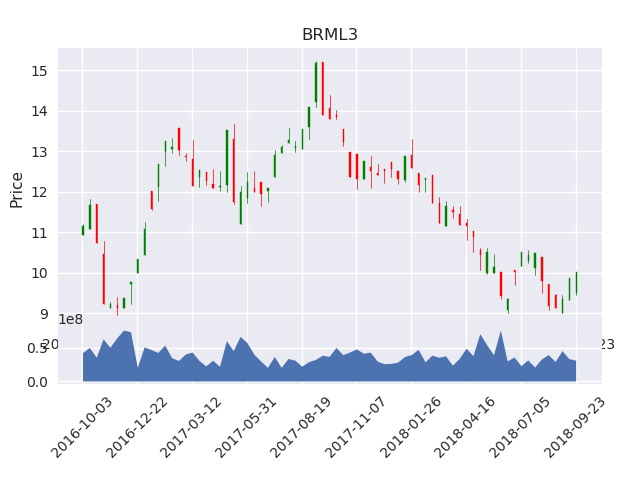

In [26]:
graph_ohlc(ohlc_BRML3, "BRML3")

<IPython.core.display.Javascript object>


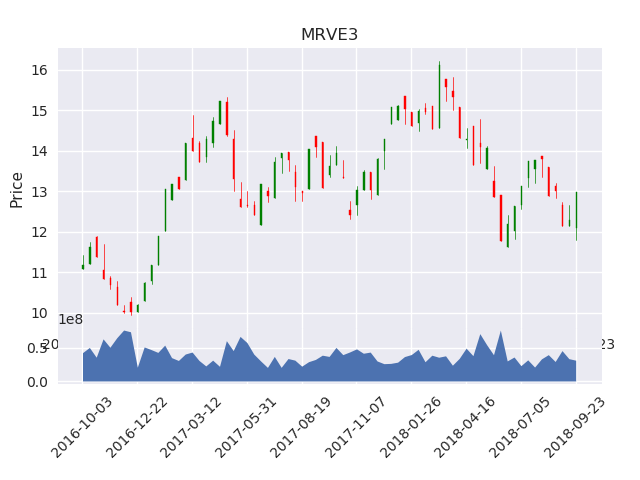

In [27]:
graph_ohlc(ohlc_MRVE3, "MRVE3")

<IPython.core.display.Javascript object>


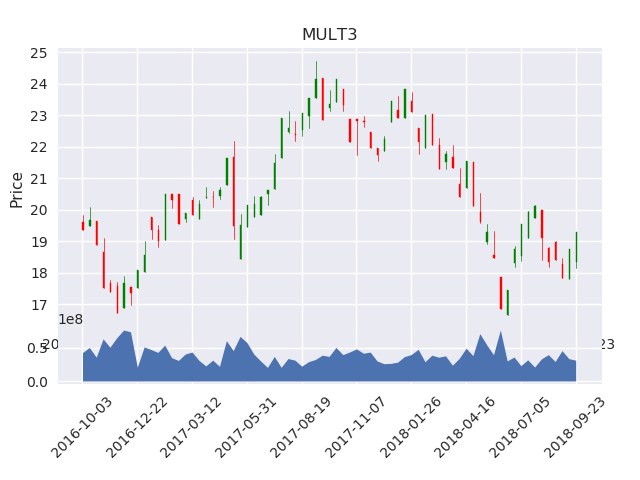

In [28]:
graph_ohlc(ohlc_MULT3,"MULT3")

<IPython.core.display.Javascript object>


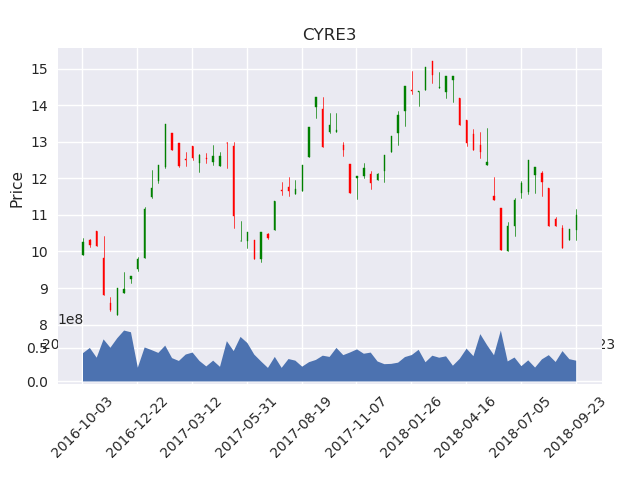

In [29]:
graph_ohlc(ohlc_CYRE3,"CYRE3")

<IPython.core.display.Javascript object>


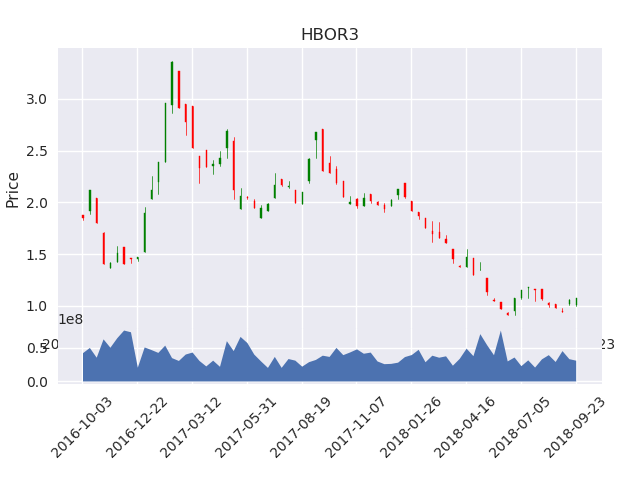

In [30]:
graph_ohlc(ohlc_HBOR3,"HBOR3")

<IPython.core.display.Javascript object>


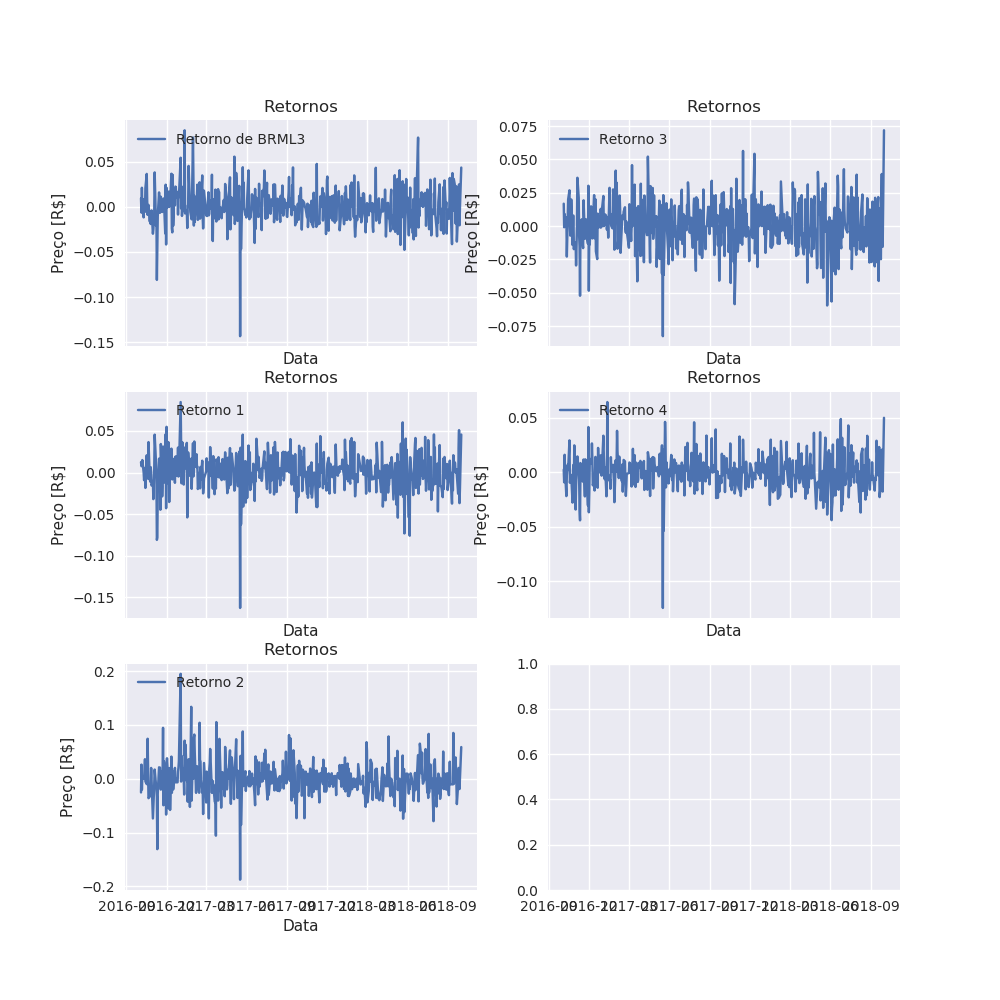

In [31]:
#fig = plt.subplots()
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(10,10))
ax[0,0].plot(dfRetorno['R_BRML3'], label='Retorno de BRML3')
ax[1,0].plot(dfRetorno['R_CYRE3'], label='Retorno 1')
ax[2,0].plot(dfRetorno['R_HBOR3'], label='Retorno 2')
ax[0,1].plot(dfRetorno['R_MRVE3'], label='Retorno 3')
ax[1,1].plot(dfRetorno['R_MULT3'], label='Retorno 4')

ax[0,0].set_ylabel("Preço [R$]")
ax[0,0].set_xlabel("Data")
ax[0,0].set_title("Retornos")
ax[0,0].legend(loc='upper left')


ax[1,0].set_ylabel("Preço [R$]")
ax[1,0].set_xlabel("Data")
ax[1,0].set_title("Retornos")
ax[1,0].legend(loc='upper left')


ax[2,0].set_ylabel("Preço [R$]")
ax[2,0].set_xlabel("Data")
ax[2,0].set_title("Retornos")
ax[2,0].legend(loc='upper left')

ax[0,1].set_ylabel("Preço [R$]")
ax[0,1].set_xlabel("Data")
ax[0,1].set_title("Retornos")
ax[0,1].legend(loc='upper left')


ax[1,1].set_ylabel("Preço [R$]")
ax[1,1].set_xlabel("Data")
ax[1,1].set_title("Retornos")
ax[1,1].legend(loc='upper left')
#plt.plot(dfRetorno['R_BRML3'])


In [38]:
IBVS=yahoo("^BVSP",S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  1 of 1 downloaded


In [54]:
IBVS = pd.DataFrame.from_dict(IBVS)
retorno_IBVS = IBVS['Close'][1:].values/IBVS['Close'][0:-1].values-1

In [55]:
retorno_IBVS

array([ 1.54198756e-02,  6.47259933e-03,  7.66770002e-03,  9.14758873e-03,
       -1.04754492e-02,  1.58959064e-03,  1.06022677e-02,  1.50403937e-02,
        1.73216792e-02, -4.32723966e-03,  5.22785249e-03,  4.22945581e-03,
       -7.48736507e-04, -3.02841086e-03, -6.26311339e-04,  6.64306082e-03,
        9.02723735e-04,  9.59445170e-03, -2.46284174e-02, -2.48870922e-02,
       -2.46153846e-03,  3.98389558e-02,  1.65490539e-03, -1.40278687e-02,
       -3.25176262e-02, -3.29569778e-02,  7.99202487e-03,  1.84722665e-02,
       -1.62774239e-02,  3.21231387e-03,  1.84783696e-02,  1.44751924e-02,
        5.16512251e-04, -9.51827832e-03,  2.65489608e-03,  2.10529736e-02,
       -2.97191950e-02,  1.50687852e-02, -3.87523019e-02,  1.35950392e-02,
       -8.02440480e-03,  2.09921112e-02,  5.33656365e-03, -1.20005211e-02,
       -2.90060484e-03, -2.18508785e-02,  1.72358438e-03, -1.80327592e-02,
        3.16086030e-03, -1.19871224e-04, -2.18876843e-02,  8.26460752e-03,
        1.11143914e-03, -